## **MGTA415_Final_Project**
### **2016 Election Analysis**

### **Team Members**:
- Allen Li
- Ye Zheng
- Hang Lyu

In [53]:
from IPython.display import Markdown
display(Markdown("polls_data.md"))

### **🏛 2016 U.S. Presidential Election Poll Data**
#### **Overview**
This repository includes polling data from **FiveThirtyEight** and the **USC Dornsife/Los Angeles Times Daybreak Poll** for the 2016 U.S. Presidential Election. These datasets track **Trump vs. Clinton polling trends**, voter demographics, and predicted election outcomes.

---

## **Poll Data Files**
The dataset consists of two primary sources:

1. **FiveThirtyEight Polls** (`president_general_polls_2016.csv`)
   - Aggregated polling data from various pollsters.
   - Provides **Trump vs. Clinton** adjusted polling percentages over time.
   - Includes **pollster name, sample size, methodology, and margin of error**.

2. **USC Dornsife/LA Times Daybreak Polls** (`popvote_votergroups.csv`)
   - Uses a **7-day rolling window** methodology.
   - Tracks voting intentions and predicted outcomes based on different voter demographics.
   - Data available for **popular vote share, win probability, and voter intentions**.

---

## **USC Daybreak Poll Data Structure**
Each file in the **USC Dornsife/LA Times dataset** is a **tab-delimited text file** with the following structure:

| **Column** | **Description** |
|------------|---------------|
| `date` | The last day of a **7-day rolling window** (e.g., "07/10/2016" includes 07/04-07/10 data) |
| `N` | Sample size for that day |
| `Trump (%)` | Predicted percentage of votes for Donald Trump |
| `Clinton (%)` | Predicted percentage of votes for Hillary Clinton |
| `sediff` | Standard error of the Trump-Clinton vote difference |
| `Lo` | Lower uncertainty boundary (gray area in the poll graphs) |
| `Up` | Upper uncertainty boundary (gray area in the poll graphs) |

---

## **Breakdown of USC Poll Files**
USC Daybreak polls also contain breakdowns based on **demographics**.

| **File Name** | **Breakdown Variable** |
|--------------|----------------------|
| `win.csv` | Overall win probability prediction |
| `pop.csv` | Popular vote share predictions |
| `int.csv` | Voter intention breakdown |
| `pop_sex_0.csv` | Female voter polling results |
| `pop_sex_1.csv` | Male voter polling results |
| `pop_rac_1.csv` | White voter polling results |
| `pop_rac_2.csv` | African-American voter polling results |
| `pop_rac_4.csv` | Hispanic voter polling results |
| `pop_age_1.csv` | 18-34 age group results |
| `pop_age_2.csv` | 35-64 age group results |
| `pop_age_3.csv` | 65+ age group results |
| `pop_edu_1.csv` | High school or less education level |
| `pop_edu_2.csv` | Some college or associate's degree |
| `pop_edu_3.csv` | Bachelor's degree or more |

Files of the format **`type_variable_category.csv`** represent a **specific subgroup** of voters.

---

## **Key Insights from the Polls**
1. **Polling Methodology**
   - FiveThirtyEight aggregates multiple poll results, adjusting for **bias and accuracy**.
   - USC Daybreak uses a **rolling 7-day average** to smooth polling trends.

2. **Voter Demographic Trends**
   - The **race breakdown** helps identify differences in Trump vs. Clinton support.
   - The **education and income breakdowns** provide insight into socioeconomic voting patterns.

3. **Margin of Error & Uncertainty**
   - The **Lo & Up values** indicate polling uncertainty (gray shaded area in visualizations).
   - The **standard error (sediff)** shows the confidence in the Trump-Clinton difference.

---

## **How to Use This Data**
- **Track overall polling trends** from **July to November 2016**.
- **Analyze voting patterns** across different **demographics** (race, gender, income, education).
- **Compare poll predictions** with **actual election results**.

---

## **References**
- [FiveThirtyEight Polling Data](https://projects.fivethirtyeight.com/polls/)
- [USC Dornsife / LA Times Daybreak Poll](https://cesrusc.org/election/)



### __Load Pools and Text Data__

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fivethirtyeight_polls = pd.read_csv("./polls/fivethirtyeight/president_general_polls_2016.csv")
usc_polls = pd.read_csv("./polls/usc_daybreak/popvote_votergroups.csv")
usc_selected = usc_polls[['date', 'Trump_Male', 'Trump_Female', 'Trump_White', 'Trump_Black', 
                          'Trump_Hispanic', 'Trump_HighSchool', 'Trump_Bachelors', 
                          'Trump_Age18t34', 'Trump_Age35t64', 'Trump_Age65p',
                          'Trump_Inc0t34k', 'Trump_Inc35t74k', 'Trump_Inc75kp',
                          'Clinton_Male', 'Clinton_Female', 'Clinton_White', 'Clinton_Black',
                          'Clinton_Hispanic', 'Clinton_HighSchool', 'Clinton_Bachelors',
                          'Clinton_Age18t34', 'Clinton_Age35t64', 'Clinton_Age65p',
                          'Clinton_Inc0t34k', 'Clinton_Inc35t74k', 'Clinton_Inc75kp']]

print("\n🔹 FiveThirtyEight Polls:")
print(fivethirtyeight_polls.head())



🔹 FiveThirtyEight Polls:
   cycle     branch        type                        matchup forecastdate  \
0   2016  President  polls-plus  Clinton vs. Trump vs. Johnson      11/8/16   
1   2016  President  polls-plus  Clinton vs. Trump vs. Johnson      11/8/16   
2   2016  President  polls-plus  Clinton vs. Trump vs. Johnson      11/8/16   
3   2016  President  polls-plus  Clinton vs. Trump vs. Johnson      11/8/16   
4   2016  President  polls-plus  Clinton vs. Trump vs. Johnson      11/8/16   

  state  startdate    enddate                  pollster grade  ...  \
0  U.S.  11/3/2016  11/6/2016  ABC News/Washington Post    A+  ...   
1  U.S.  11/1/2016  11/7/2016   Google Consumer Surveys     B  ...   
2  U.S.  11/2/2016  11/6/2016                     Ipsos    A-  ...   
3  U.S.  11/4/2016  11/7/2016                    YouGov     B  ...   
4  U.S.  11/3/2016  11/6/2016          Gravis Marketing    B-  ...   

   adjpoll_clinton adjpoll_trump  adjpoll_johnson  adjpoll_mcmullin  \
0      

In [85]:
print("\n🔹 USC Daybreak Polls:")
print(usc_polls.head())


🔹 USC Daybreak Polls:
      date     N  Trump_Male  Clinton_Male  sediff_Male    Lo_Male    Up_Male  \
0  7/10/16  1282   49.757304     37.366966     5.951436  37.729727  49.394543   
1  7/11/16  1520   51.589910     35.386664     5.414716  38.181865  48.794709   
2  7/12/16  1600   50.213794     36.105722     5.391001  37.876577  48.442938   
3  7/13/16  1607   50.508472     35.717524     5.362496  37.857752  48.368244   
4  7/14/16  1608   50.528543     35.763690     6.389299  36.884604  49.407629   

   Nsubgrp_Male  Trump_Female  Clinton_Female  ...  Clinton_Inc75kp  \
0           599     36.327399       42.924916  ...        42.134577   
1           712     36.085853       44.535520  ...        41.736354   
2           747     37.496277       44.106166  ...        41.836224   
3           742     36.843191       43.820402  ...        40.130013   
4           750     35.309567       44.504249  ...        40.123946   

   sediff_Inc75kp  Lo_Inc75kp  Up_Inc75kp  Nsubgrp_Inc75kp  Tru

In [59]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re


import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/daallen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daallen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
import os
debate_path = "./debates/"
speech_path_trump = "./speeches/trump/"
speech_path_clinton = "./speeches/clinton/"

debate_files = [f for f in os.listdir(debate_path) if f.endswith('.txt')]
debates = {file: open(debate_path + file, encoding="utf-8").read() for file in debate_files}

trump_files = [f for f in os.listdir(speech_path_trump) if f.endswith('.txt')]
trump_speeches = {file: open(speech_path_trump + file, encoding="utf-8").read() for file in trump_files}

clinton_files = [f for f in os.listdir(speech_path_clinton) if f.endswith('.txt')]
clinton_speeches = {file: open(speech_path_clinton + file, encoding="utf-8").read() for file in clinton_files}

print("Debates:", debates.keys())  
print("Trump Speeches:", len(trump_speeches))  
print("Clinton Speeches:", len(clinton_speeches))

Debates: dict_keys(['clinton_2nd.txt', 'trump_2nd.txt', 'trump_1st.txt', 'trump_3rd.txt', 'clinton_1st.txt', 'clinton_3rd.txt'])
Trump Speeches: 64
Clinton Speeches: 35


### __Clean Polls Data__

In [86]:
fivethirtyeight_polls['date'] = pd.to_datetime(fivethirtyeight_polls['enddate'])
usc_polls['date'] = pd.to_datetime(usc_polls['date'], errors='coerce')

usc_polls = usc_polls.dropna(subset=['date'])
fivethirtyeight_polls = fivethirtyeight_polls.dropna(subset=['date'])

/var/folders/dr/6vxzr__s30s7qjrstc241hth0000gn/T/ipykernel_13898/868901835.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  usc_polls['date'] = pd.to_datetime(usc_polls['date'], errors='coerce')


In [87]:
fivethirtyeight_polls_cleaned = fivethirtyeight_polls[['date', 'pollster', 'adjpoll_trump', 'adjpoll_clinton']]

In [88]:
usc_selected = usc_polls[['date', 'Trump_Male', 'Trump_Female', 'Trump_White', 'Trump_Black', 
                          'Trump_Hispanic', 'Trump_HighSchool', 'Trump_Bachelors', 
                          'Trump_Age18t34', 'Trump_Age35t64', 'Trump_Age65p',
                          'Trump_Inc0t34k', 'Trump_Inc35t74k', 'Trump_Inc75kp',
                          'Clinton_Male', 'Clinton_Female', 'Clinton_White', 'Clinton_Black',
                          'Clinton_Hispanic', 'Clinton_HighSchool', 'Clinton_Bachelors',
                          'Clinton_Age18t34', 'Clinton_Age35t64', 'Clinton_Age65p',
                          'Clinton_Inc0t34k', 'Clinton_Inc35t74k', 'Clinton_Inc75kp']]

Below is the polling trends for the 2016 election

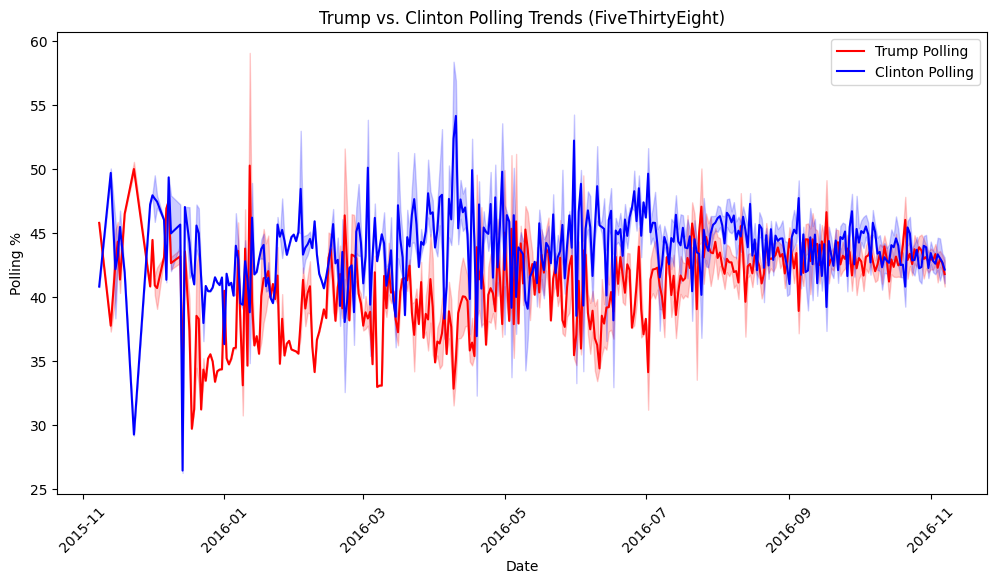

In [73]:
plt.figure(figsize=(12,6))

sns.lineplot(x=fivethirtyeight_polls_cleaned['date'], 
             y=fivethirtyeight_polls_cleaned['adjpoll_trump'], 
             label="Trump Polling", color='red')

sns.lineplot(x=fivethirtyeight_polls_cleaned['date'], 
             y=fivethirtyeight_polls_cleaned['adjpoll_clinton'], 
             label="Clinton Polling", color='blue')

plt.xlabel("Date")
plt.ylabel("Polling %")
plt.title("Trump vs. Clinton Polling Trends (FiveThirtyEight)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

### __Clean&Preprocessing Text Data__

In [61]:
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    words = word_tokenize(text) 
    words = [word for word in words if word not in stopwords.words('english') and len(word) > 2] 
    return words

In [62]:
# example
trump_1st_tokens = preprocess_text(debates["trump_1st.txt"])
print(trump_1st_tokens[:50])

['thank', 'lester', 'jobs', 'fleeing', 'country', 'theyre', 'going', 'mexico', 'theyre', 'going', 'many', 'countries', 'look', 'china', 'country', 'terms', 'making', 'product', 'theyre', 'devaluing', 'currency', 'theres', 'nobody', 'government', 'fight', 'good', 'fight', 'winning', 'fight', 'theyre', 'using', 'country', 'piggy', 'bank', 'rebuild', 'china', 'many', 'countries', 'thing', 'losing', 'good', 'jobs', 'many', 'look', 'whats', 'happening', 'mexico', 'friend', 'mine', 'builds']


In [63]:
debates_processed = {file: preprocess_text(text) for file, text in debates.items()}

trump_processed = {file: preprocess_text(text) for file, text in trump_speeches.items()}

clinton_processed = {file: preprocess_text(text) for file, text in clinton_speeches.items()}

print("Processed Trump Speech Example:", list(trump_processed.keys())[0])
print(trump_processed[list(trump_processed.keys())[0]][:20])  

print("Processed Clinton Speech Example:", list(clinton_processed.keys())[0])
print(clinton_processed[list(clinton_processed.keys())[0]][:20])  


Processed Trump Speech Example: Trump_HendersonNV_Oct-5-16.txt
['thank', 'great', 'city', 'henderson', 'beautiful', 'state', 'nevada', 'state', 'many', 'great', 'friends', 'employees', 'days', 'going', 'win', 'state', 'going', 'win', 'white', 'house']
Processed Clinton Speech Example: Clinton_WiltonManorsFL_Oct-30-16.txt
['excited', 'want', 'thank', 'know', 'really', 'sorry', 'know', 'lot', 'people', 'outdoors', 'cant', 'get', 'inso', 'want', 'give', 'big', 'shout', 'overflow', 'outside', 'lot']


### __Word Frequency Analysis__

For analyzing frequent words in speeches across debates, Trump, and Clinton speeches.

In [64]:
from collections import Counter

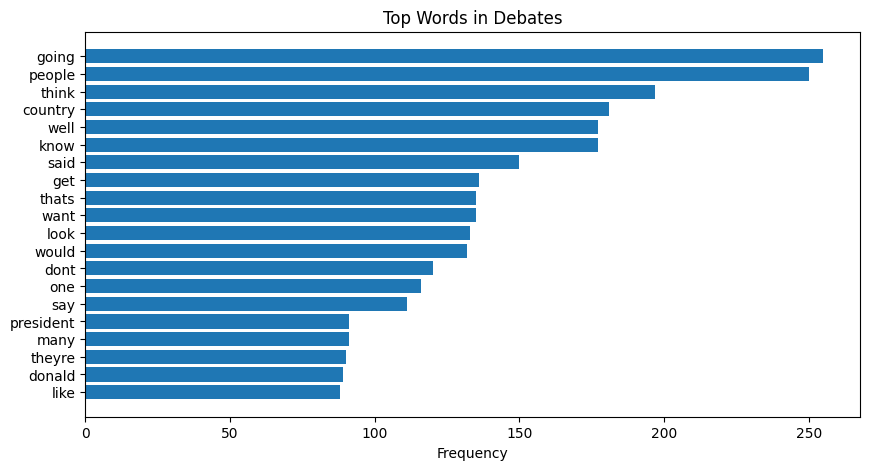

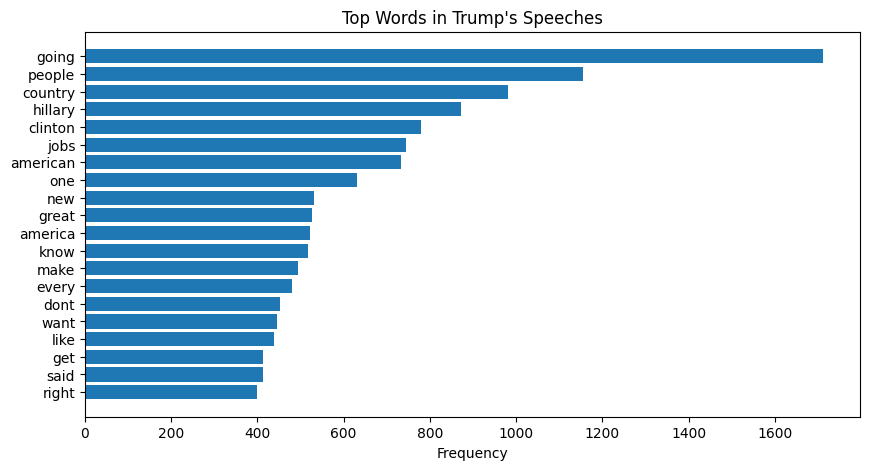

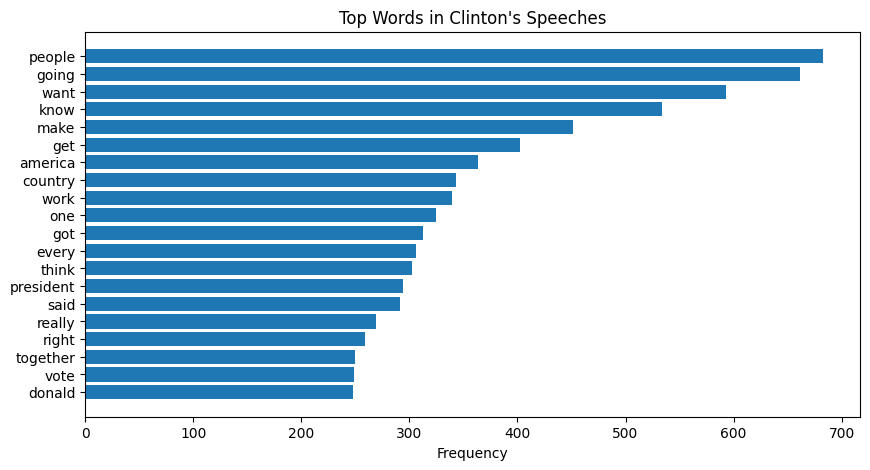

In [65]:
def plot_most_common_words(word_dict, title, n=20):
    all_words = [word for words in word_dict.values() for word in words]
    word_counts = Counter(all_words).most_common(n) 
    
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10,5))
    plt.barh(words, counts)
    plt.xlabel("Frequency")
    plt.title(title)
    plt.gca().invert_yaxis() 
    plt.show()


plot_most_common_words(debates_processed, "Top Words in Debates")
plot_most_common_words(trump_processed, "Top Words in Trump's Speeches")
plot_most_common_words(clinton_processed, "Top Words in Clinton's Speeches")

### __Word Cloud Visual__

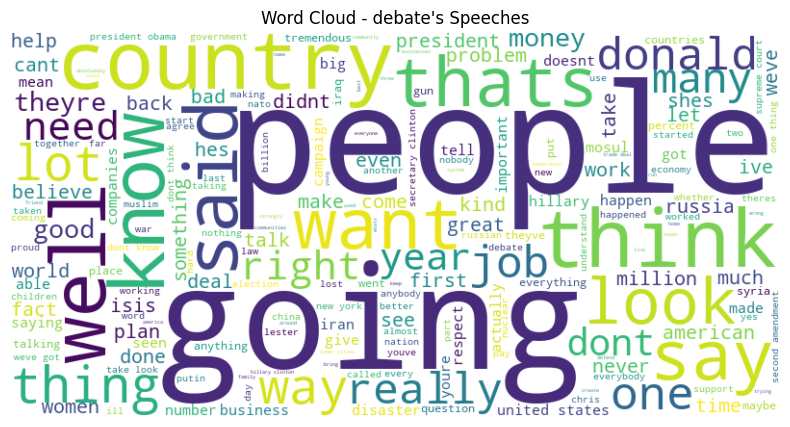

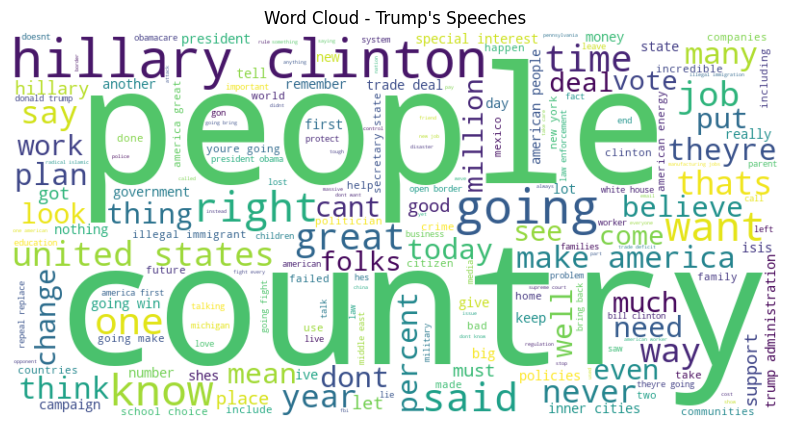

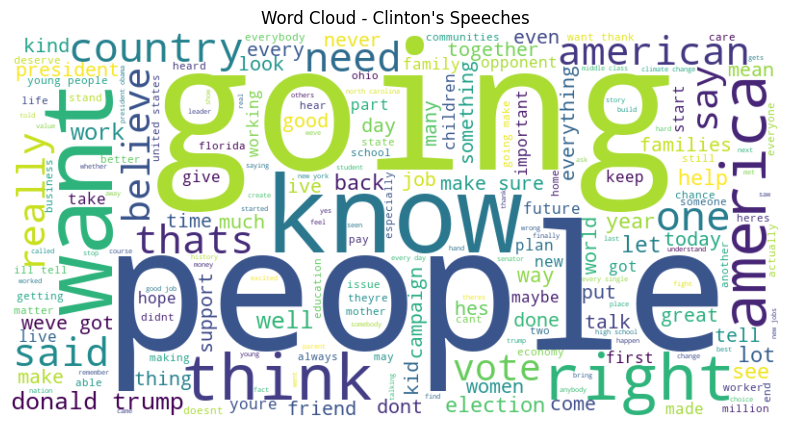

In [66]:
!pip install wordcloud

from wordcloud import WordCloud

def generate_wordcloud(word_dict, title):
    all_text = " ".join([" ".join(words) for words in word_dict.values()])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_wordcloud(debates_processed, "Word Cloud - debate's Speeches")
generate_wordcloud(trump_processed, "Word Cloud - Trump's Speeches")
generate_wordcloud(clinton_processed, "Word Cloud - Clinton's Speeches")


### __Sentiment Analysis__

In [67]:
from textblob import TextBlob
import pandas as pd

def compute_sentiment(word_dict):
    sentiment_scores = {file: TextBlob(" ".join(words)).sentiment.polarity for file, words in word_dict.items()}
    return pd.DataFrame(sentiment_scores.items(), columns=["Speech", "Sentiment"])

df_trump_sentiment = compute_sentiment(trump_processed)
df_clinton_sentiment = compute_sentiment(clinton_processed)


df_trump_sentiment_sorted = df_trump_sentiment.sort_values(by="Sentiment", ascending=False)
df_clinton_sentiment_sorted = df_clinton_sentiment.sort_values(by="Sentiment", ascending=False)

print("Top 5 Most Positive Trump Speeches")
print(df_trump_sentiment_sorted.head())

print("Top 5 Most Negative Trump Speeches")
print(df_trump_sentiment_sorted.tail())


Top 5 Most Positive Trump Speeches
                              Speech  Sentiment
10        Trump_Detroit_Sep-3-16.txt   0.265746
9   Trump_ValleyForgePA_Nov-1-16.txt   0.202084
31     Trump_Cincinnati_Sep-1-16.txt   0.185910
7        Trump_GreenBay_Aug-5-16.txt   0.180444
33     Trump_RoanokeVA_Sep-24-16.txt   0.168445
Top 5 Most Negative Trump Speeches
                            Speech  Sentiment
52   Trump_JacksonMS_Aug-24-16.txt   0.020031
32  Trump_GreenBayWI_Oct-17-16.txt   0.002727
3     Trump_GoldenCO_Oct-29-16.txt   0.000542
25     Trump_Phoenix_Oct-29-16.txt  -0.016475
22     Trump_Houston_Sep-17-16.txt  -0.029789


In [68]:
print("Top 5 Most Positive Clinton Speeches")
print(df_clinton_sentiment_sorted.head())

print("Top 5 Most Negative Clinton Speeches")
print(df_clinton_sentiment_sorted.tail())

Top 5 Most Positive Clinton Speeches
                                  Speech  Sentiment
8           Clinton_Raleigh_Nov-7-16.txt   0.287057
32  Clinton_CoralSpringsFL_Sep-30-16.txt   0.214971
6       Clinton_FtPierceFL_Sep-30-16.txt   0.213874
20      Clinton_Pittsburgh_Oct-22-16.txt   0.208904
19  Clinton_WinstonSalemNC_Oct-27-16.txt   0.199506
Top 5 Most Negative Clinton Speeches
                           Speech  Sentiment
5   Clinton_MiamiFL_Oct-11-16.txt   0.122226
16   Clinton_KentOH_Oct-31-16.txt   0.117424
24       Clinton_DC_Sep-16-16.txt   0.115682
26    Clinton_Toledo_Oct-3-16.txt   0.110277
17      Clinton_NYC_Oct-20-16.txt   0.084909


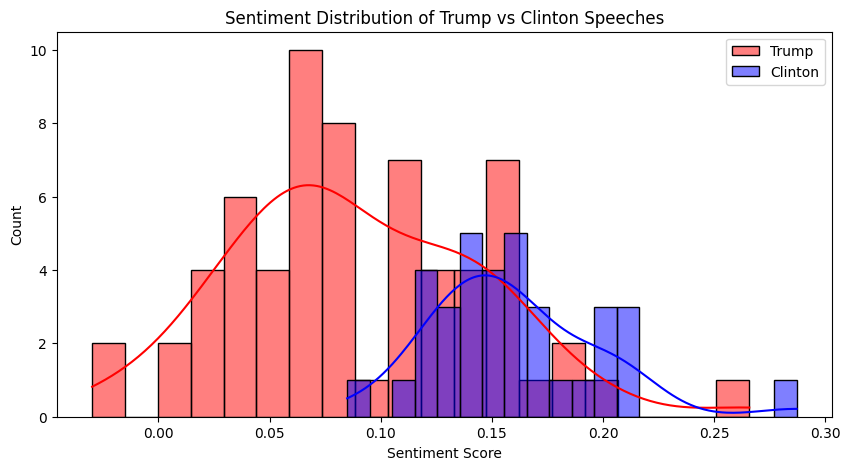

In [69]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df_trump_sentiment["Sentiment"], kde=True, bins=20, color='red', label="Trump")
sns.histplot(df_clinton_sentiment["Sentiment"], kde=True, bins=20, color='blue', label="Clinton")
plt.xlabel("Sentiment Score")
plt.title("Sentiment Distribution of Trump vs Clinton Speeches")
plt.legend()
plt.show()


### __Topic Modeling (LDA)__

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def extract_topics(word_dict, n_topics=3):
    all_text = [" ".join(words) for words in word_dict.values()]
    
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(all_text)
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(lda.components_):
        print(f"Topic {idx+1}: ", [words[i] for i in topic.argsort()[-10:]])

# Extract topics from Trump & Clinton speeches
print("🔹 Topics in Trump Speeches:")
extract_topics(trump_processed)

print("\n🔹 Topics in Clinton Speeches:")
extract_topics(clinton_processed)


🔹 Topics in Trump Speeches:
Topic 1:  ['country', 'like', 'right', 'great', 'said', 'theyre', 'dont', 'know', 'people', 'going']
Topic 2:  ['make', 'america', 'new', 'going', 'people', 'jobs', 'hillary', 'clinton', 'country', 'american']
Topic 3:  ['make', 'american', 'illegal', 'people', 'america', 'jobs', 'clinton', 'hillary', 'country', 'going']

🔹 Topics in Clinton Speeches:
Topic 1:  ['donald', 'president', 'got', 'work', 'america', 'make', 'want', 'know', 'people', 'going']
Topic 2:  ['know', 'vote', 'thank', 'got', 'country', 'work', 'make', 'going', 'want', 'people']
Topic 3:  ['world', 'plan', 'going', 'service', 'america', 'new', 'country', 'jobs', 'american', 'people']


### __Analyze Word Impact on Demographics__

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

trump_speeches_text = [" ".join(words) for words in trump_processed.values()]
clinton_speeches_text = [" ".join(words) for words in clinton_processed.values()]

vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
trump_tfidf = vectorizer.fit_transform(trump_speeches_text)
clinton_tfidf = vectorizer.fit_transform(clinton_speeches_text)

top_trump_words = pd.DataFrame(trump_tfidf.toarray(), columns=vectorizer.get_feature_names_out()).mean().sort_values(ascending=False).head(20)
top_clinton_words = pd.DataFrame(clinton_tfidf.toarray(), columns=vectorizer.get_feature_names_out()).mean().sort_values(ascending=False).head(20)

print("\n🔹 Top Words in Trump's Speeches:")
print(top_trump_words)


🔹 Top Words in Trump's Speeches:
grateful             0.246796
plans                0.166204
crisis               0.163120
hillaryclintoncom    0.156040
color                0.147097
anybody              0.146172
kids                 0.134830
night                0.096518
answer               0.096372
man                  0.088899
hampshire            0.073225
wealthy              0.066134
latinos              0.064878
half                 0.062700
little               0.059239
elect                0.058905
universities         0.057396
security             0.053616
stood                0.052660
saw                  0.052576
dtype: float64


In [76]:
print("\n🔹 Top Words in Clinton's Speeches:")
print(top_clinton_words)


🔹 Top Words in Clinton's Speeches:
people       0.203257
going        0.191420
want         0.175613
know         0.160121
make         0.136513
country      0.110439
america      0.110317
work         0.102941
got          0.097273
president    0.095419
donald       0.089425
think        0.088743
trump        0.088034
vote         0.087861
said         0.086973
really       0.082089
election     0.078939
right        0.078276
need         0.077996
believe      0.075993
dtype: float64


To specify the impact of words on different demographics, we will select a few words and analyze their impact on different demographics.

In [ ]:
top_trump_words = list(top_trump_words.index)  
top_clinton_words = list(top_clinton_words.index)  

In [142]:
def track_selected_words(words_list, speech_data):
    """
    Track the usage of specific words over time in a dict of
    {filename: <list_of_words_in_that_file>}.
    """
    word_counts = {word: [] for word in words_list}
    dates = []

    for filename, words in speech_data.items():
        # Example: your filenames might look like "some_speech_2016-08-15.txt"
        date = filename.split("_")[-1].replace(".txt", "")  
        dates.append(date)
        for word in words_list:
            word_counts[word].append(words.count(word))

    df_word_trend = pd.DataFrame(word_counts)
    df_word_trend["Date"] = pd.to_datetime(dates, errors="coerce")
    return df_word_trend

In [ ]:
trump_words_trend = track_selected_words(top_trump_words, trump_processed)
clinton_words_trend = track_selected_words(top_clinton_words, clinton_processed)

trump_words_trend = trump_words_trend.add_prefix("word_")
clinton_words_trend = clinton_words_trend.add_prefix("word_")

trump_words_trend.rename(columns={"word_Date": "Date"}, inplace=True)
clinton_words_trend.rename(columns={"word_Date": "Date"}, inplace=True)

trump_words_trend["Date"] = pd.to_datetime(trump_words_trend["Date"], errors="coerce")
clinton_words_trend["Date"] = pd.to_datetime(clinton_words_trend["Date"], errors="coerce")


/var/folders/dr/6vxzr__s30s7qjrstc241hth0000gn/T/ipykernel_13898/3080607093.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_word_trend["Date"] = pd.to_datetime(dates, errors="coerce")
/var/folders/dr/6vxzr__s30s7qjrstc241hth0000gn/T/ipykernel_13898/3080607093.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_word_trend["Date"] = pd.to_datetime(dates, errors="coerce")


In [144]:
trump_merged = pd.merge(
    usc_selected, trump_words_trend, left_on="date", right_on="Date", how="inner"
)
clinton_merged = pd.merge(
    usc_selected, clinton_words_trend, left_on="date", right_on="Date", how="inner"
)

# Drop the duplicate “Date” column after merging
trump_merged.drop(columns=["Date"], inplace=True)
clinton_merged.drop(columns=["Date"], inplace=True)

print(trump_merged.head())
print(clinton_merged.head())

        date  Trump_Male  Trump_Female  Trump_White  Trump_Black  \
0 2016-08-05   51.501385     37.304081    54.361638     4.353172   
1 2016-08-08   48.514859     38.746610    53.846659     3.286606   
2 2016-08-09   48.502031     38.804803    53.802440     3.518760   
3 2016-08-12   46.647355     38.137361    52.847517     3.226374   
4 2016-08-15   47.267887     37.278471    51.661877     4.807870   

   Trump_Hispanic  Trump_HighSchool  Trump_Bachelors  Trump_Age18t34  \
0       31.018020         49.853627        35.777119       41.846431   
1       30.368517         46.015342        36.881877       38.028921   
2       32.395496         46.575640        36.188318       38.782845   
3       25.628454         45.053135        35.137530       35.993759   
4       29.241113         48.855934        33.566918       35.677274   

   Trump_Age35t64  Trump_Age65p  Trump_Inc0t34k  Trump_Inc35t74k  \
0       44.084069     47.500743       36.355284        49.312192   
1       44.067030     

In [156]:
df_trump_corr = trump_merged.corr()
df_clinton_corr = clinton_merged.corr()

demographic_cols = [
    c for c in df_trump_corr.columns 
    if c.startswith("Trump_")
]
word_cols = [c for c in df_trump_corr.columns if c.startswith("word_")]

trump_corr_pairs = (
    df_trump_corr.loc[demographic_cols, word_cols]
    .unstack()
    .reset_index()
)
trump_corr_pairs.columns = ["Word", "Demographic", "Correlation"]


In [ ]:
trump_corr_pairs = trump_corr_pairs[
    trump_corr_pairs["Word"] != trump_corr_pairs["Demographic"]
]

trump_corr_pairs = trump_corr_pairs.reindex(
    trump_corr_pairs["Correlation"].abs().sort_values(ascending=False).index
)

print("\nTop Trump Word–Demographic Correlations:")
print(trump_corr_pairs.head(10))



Top Trump Word–Demographic Correlations:
             Word       Demographic  Correlation
148  word_wealthy  Trump_HighSchool     0.464373
154  word_wealthy   Trump_Inc35t74k     0.410551
54     word_color       Trump_White    -0.405351
64     word_color     Trump_Inc75kp    -0.393352
146  word_wealthy       Trump_Black     0.381626
151  word_wealthy    Trump_Age35t64     0.376423
143  word_wealthy        Trump_Male     0.361057
252      word_saw  Trump_HighSchool    -0.349511
61     word_color      Trump_Age65p    -0.344034
68   word_anybody       Trump_Black    -0.335219


In [158]:
demographic_cols = [
    c for c in df_clinton_corr.columns 
    if c.startswith("Clinton_") 
]
word_cols = [c for c in df_clinton_corr.columns if c.startswith("word_")]

clinton_corr_pairs = (
    df_clinton_corr.loc[demographic_cols, word_cols]
    .unstack()
    .reset_index()
)
clinton_corr_pairs.columns = ["Word", "Demographic", "Correlation"]

In [ ]:
clinton_corr_pairs = clinton_corr_pairs[
    clinton_corr_pairs["Word"] != clinton_corr_pairs["Demographic"]
]

clinton_corr_pairs = clinton_corr_pairs.reindex(
    clinton_corr_pairs["Correlation"].abs().sort_values(ascending=False).index
)

print("\nTop Trump Word–Demographic Correlations:")
print(clinton_corr_pairs.head(10))


Top Trump Word–Demographic Correlations:
              Word        Demographic  Correlation
179      word_vote   Clinton_Inc0t34k     0.577819
141    word_donald  Clinton_Inc35t74k     0.550477
140    word_donald   Clinton_Inc0t34k     0.549506
218  word_election   Clinton_Inc0t34k     0.493865
133    word_donald      Clinton_Black     0.480644
112       word_got   Clinton_Age35t64     0.462733
164     word_trump   Clinton_Age35t64     0.452957
39       word_know       Clinton_Male     0.450952
191      word_said     Clinton_Age65p    -0.448402
201    word_really  Clinton_Bachelors     0.446647


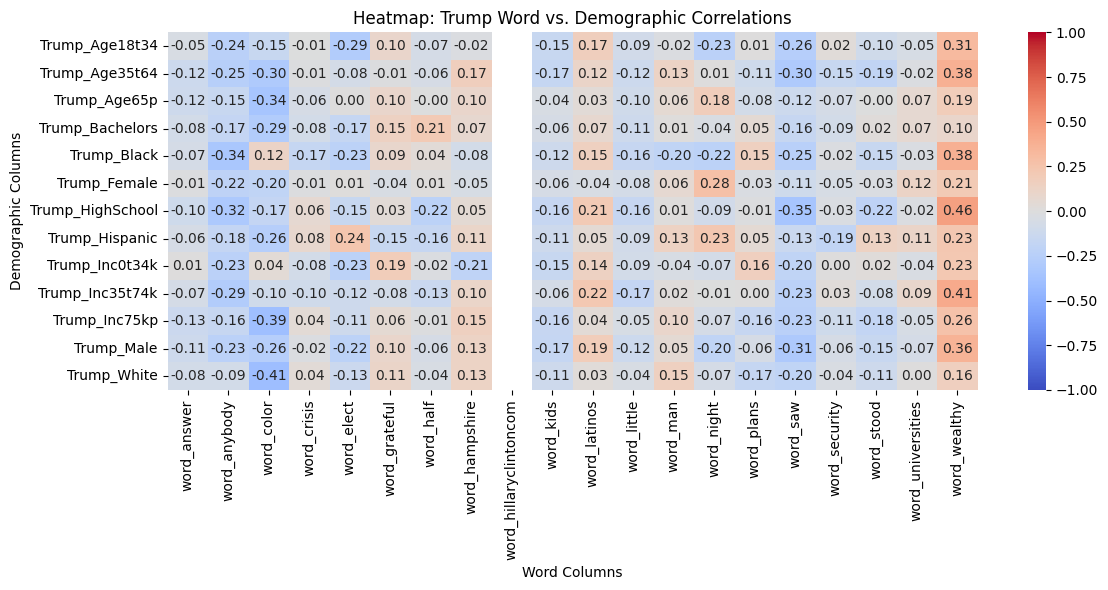

In [ ]:
trump_corr_matrix = trump_corr_pairs.pivot(index='Demographic', columns='Word', values='Correlation')

plt.figure(figsize=(12, 6))
sns.heatmap(
    trump_corr_matrix, 
    cmap="coolwarm",    # Color palette
    annot=True,         # Show actual correlation values in each cell
    fmt=".2f",          # Round to 2 decimal places
    vmin=-1, vmax=1     # Ensure color scale goes from -1 to 1
)
plt.title("Heatmap: Trump Word vs. Demographic Correlations")
plt.xlabel("Word Columns")
plt.ylabel("Demographic Columns")
plt.tight_layout()
plt.show()

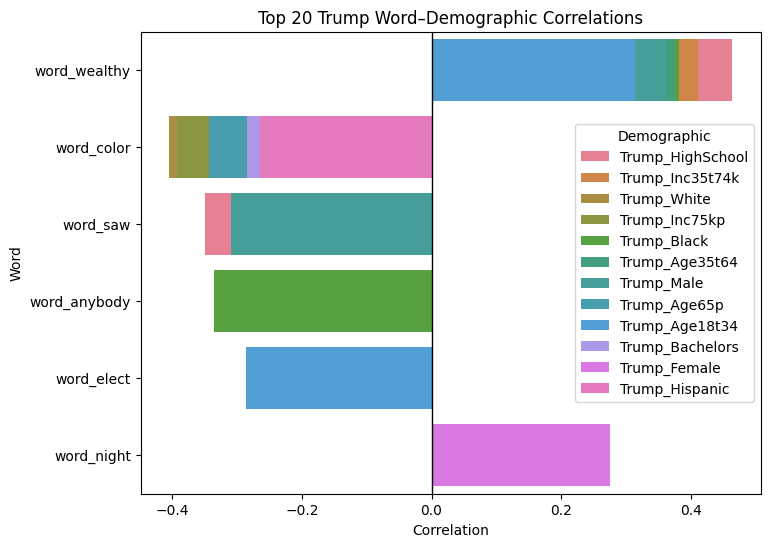

In [162]:
trump_corr_pairs_sorted = trump_corr_pairs.reindex(
    trump_corr_pairs["Correlation"].abs().sort_values(ascending=False).index
)

# Optionally show the top 20
top_n = 20
subset = trump_corr_pairs_sorted.head(top_n).copy()

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=subset, 
    y="Word", 
    x="Correlation", 
    hue="Demographic",  # If you want different bar colors by demographic
    dodge=False         # So each 'Word' is on its own line
)
plt.axvline(0, color="black", linewidth=1)
plt.title(f"Top {top_n} Trump Word–Demographic Correlations")
plt.show()


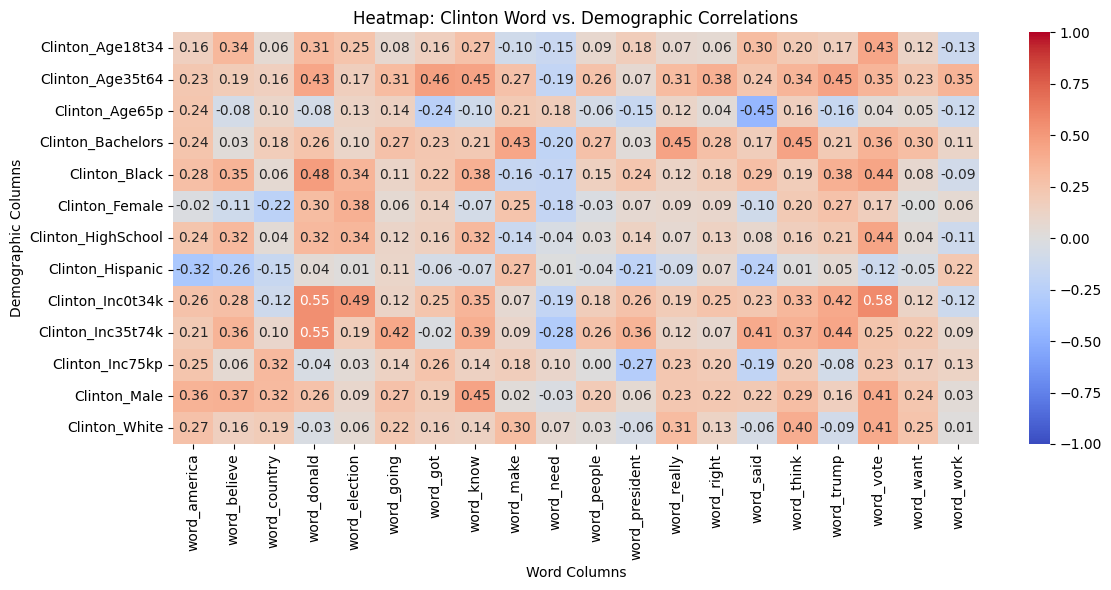

In [163]:
clinton_corr_matrix = clinton_corr_pairs.pivot(index='Demographic', columns='Word', values='Correlation')

plt.figure(figsize=(12, 6))
sns.heatmap(
    clinton_corr_matrix, 
    cmap="coolwarm",    # Color palette
    annot=True,         # Show actual correlation values in each cell
    fmt=".2f",          # Round to 2 decimal places
    vmin=-1, vmax=1     # Ensure color scale goes from -1 to 1
)
plt.title("Heatmap: Clinton Word vs. Demographic Correlations")
plt.xlabel("Word Columns")
plt.ylabel("Demographic Columns")
plt.tight_layout()
plt.show()

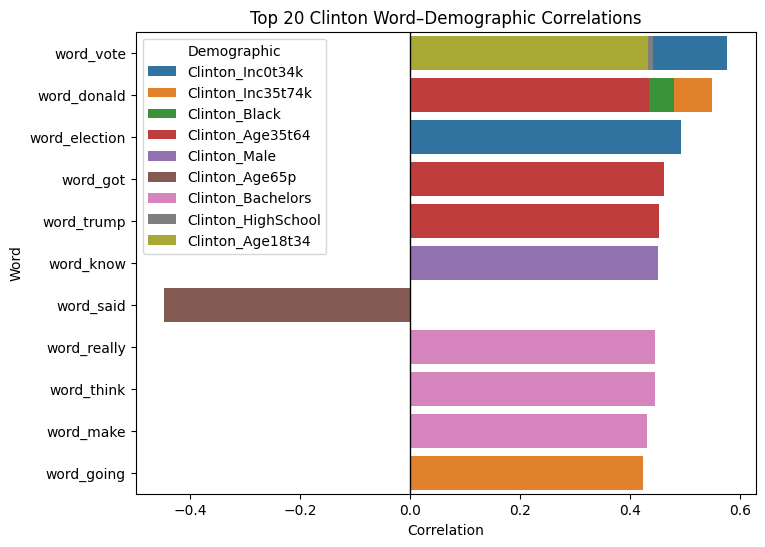

In [164]:
clinton_corr_pairs_sorted = clinton_corr_pairs.reindex(
    clinton_corr_pairs["Correlation"].abs().sort_values(ascending=False).index
)

# Optionally show the top 20
top_n = 20
subset = clinton_corr_pairs_sorted.head(top_n).copy()

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=subset, 
    y="Word", 
    x="Correlation", 
    hue="Demographic",  # If you want different bar colors by demographic
    dodge=False         # So each 'Word' is on its own line
)
plt.axvline(0, color="black", linewidth=1)
plt.title(f"Top {top_n} Clinton Word–Demographic Correlations")
plt.show()
